In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import tensorflow as tf

In [2]:
def load_data():
    # 读取数据
    x = np.load('train_data/train_data_emd.npy')
    y = np.load('train_data/label_emd.npy')
    num = len(Counter(y))
    print("类别数量为：", num)
    return x, y, num

In [3]:
def create_train_data(x, y, ratio=0.8):
    """
    x:数据
    y:类别
    ratio:生成训练集比率
    """
    # 打乱顺序
    # 读取data矩阵的第一维数（图片的个数）
    num_example = x.shape[0]
    # 产生一个num_example范围，步长为1的序列
    arr = np.arange(num_example)
    # 调用函数，打乱顺序
    np.random.seed(99)
    np.random.shuffle(arr)
    # 按照打乱的顺序，重新排序
    arr_data = x[arr]
    arr_label = y[arr]
    # 将数据集分为训练集80%、测试集20%
    s = int(num_example * ratio)
    x_train = arr_data[:s]
    y_train = arr_label[:s]
    x_val = arr_data[s:]
    y_val = arr_label[s:]
    print("训练集shape", x_train.shape)
    print("训练集类别：", Counter(y_train))
    print("测试集shape", x_val.shape)
    print("测试集类别：", Counter(y_val))
    return x_train, y_train, x_val, y_val

In [4]:
# 读取数据
data, label, label_count = load_data()
# 生成训练集测试集,70%用作训练，30%用作测试
train_data, train_label, val_data, val_label = create_train_data(data, label, 0.7)
print("*"*10)
print("训练集数量：",len(train_label))
print("测试集数量：",len(val_label))

类别数量为： 4
训练集shape (2520, 1000, 1)
训练集类别： Counter({0: 645, 2: 630, 1: 629, 3: 616})
测试集shape (1080, 1000, 1)
测试集类别： Counter({3: 284, 1: 271, 2: 270, 0: 255})
**********
训练集数量： 2520
测试集数量： 1080


## 随机森林

In [5]:
# 使用机器学习算法需要对多维数据进行降维
m_train = train_data.reshape(train_data.shape[0],train_data.shape[1]*train_data.shape[2])
m_val = val_data.reshape(val_data.shape[0],val_data.shape[1]*val_data.shape[2])

# 设置训练迭代次数
epoch = 20

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn import model_selection
from sklearn.preprocessing import  OneHotEncoder

In [7]:
# 模型参数设置
'''
第一类：
n_estimators：学习器的个数，interger，默认100
bootstrap：是否有放回抽样，boolean，默认True
第二类：
max_features：节点分裂时参与判断的最大特征数，默认auto，即sqrt(n_features)
max_depth：树的最大深度，int或None，默认None，表示对最大深度没有限制
min_samples_split：最小样本划分的数目，
min_samples_leaf：叶子节点最少样本数
'''

rfc = RandomForestClassifier(n_estimators = 100,min_samples_split = 5,min_samples_leaf = 4,max_depth = 5)

# 模型准确率和损失值
sum = 0
acc_list = []
loss_list = []
train_acc_list = []
print("开始训练")
for i in range(1,epoch +1):

    # 模型训练
    rfc.fit(m_train,train_label)

    # # 训练集
    # y_train = rfc.predict(m_train)

    # 测试集
    y_pred = np.asarray(rfc.predict(m_val),dtype = 'int64')

    # 计算准确率
    acc = round(accuracy_score(val_label, y_pred),3)
    
    # 训练集
    y_pred = np.asarray(rfc.predict(m_train),dtype = 'int64')
    # 计算准确率
    train_acc = round(accuracy_score(train_label, y_pred),3)
    
    # print('测试集准确率:', round(accuracy_score(val_label, y_pred),3))
    acc_list.append(acc)
    train_acc_list.append(train_acc)
    
    # 计算损失值
    # 使用one-hot编码计算损失值
    noe_hot = OneHotEncoder(sparse = False)

    y_pred_o = noe_hot.fit_transform(y_pred.reshape(1, -1))
    val_label_o = noe_hot.fit_transform(val_label.reshape(1, -1))
#     loss = round(log_loss(val_label_o,y_pred_o),3)
    # print("loss：",round(log_loss(val_label,y_pred),3))
#     loss_list.append(loss)
    print("完成第",i,"轮训练，测试集准确率：",acc)
    sum += acc
print("平均准确率：", sum / i)

开始训练
完成第 1 轮训练，测试集准确率： 0.691
完成第 2 轮训练，测试集准确率： 0.681
完成第 3 轮训练，测试集准确率： 0.69
完成第 4 轮训练，测试集准确率： 0.696
完成第 5 轮训练，测试集准确率： 0.688
完成第 6 轮训练，测试集准确率： 0.678
完成第 7 轮训练，测试集准确率： 0.683
完成第 8 轮训练，测试集准确率： 0.684
完成第 9 轮训练，测试集准确率： 0.709
完成第 10 轮训练，测试集准确率： 0.683
完成第 11 轮训练，测试集准确率： 0.692
完成第 12 轮训练，测试集准确率： 0.695
完成第 13 轮训练，测试集准确率： 0.688
完成第 14 轮训练，测试集准确率： 0.682
完成第 15 轮训练，测试集准确率： 0.696
完成第 16 轮训练，测试集准确率： 0.697
完成第 17 轮训练，测试集准确率： 0.677
完成第 18 轮训练，测试集准确率： 0.688
完成第 19 轮训练，测试集准确率： 0.67
完成第 20 轮训练，测试集准确率： 0.689
平均准确率： 0.68785


In [8]:
y_pred = np.asarray(rfc.predict(m_val),dtype = 'int64')
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),3))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.689
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       255
           1       0.52      0.42      0.47       271
           2       0.51      0.61      0.56       270
           3       0.84      0.91      0.87       284

    accuracy                           0.69      1080
   macro avg       0.69      0.69      0.69      1080
weighted avg       0.69      0.69      0.69      1080



## 模型迭代准确率

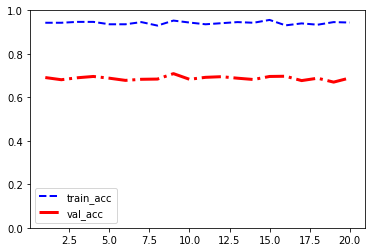

In [9]:
# 设置Y轴范围
plt.ylim(0,1)
# 训练准确率曲线
show_data1 = train_acc_list
# 测试准确率曲线
show_data2 = acc_list
x_data = list(range(1,len(show_data1)+1))
ln1, = plt.plot(x_data,show_data1,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train_acc','val_acc'])
plt.show()

In [10]:
from joblib import dump, load
# 保存模型
dump(rfc, 'models_save/rfc_emd.joblib') 
# # 加载
# rfc = load('models_save/rfc.joblib')
# print(rfc)

['models_save/rfc_emd.joblib']

# CNN

In [11]:
from tensorflow import keras
from tensorflow.keras import layers, models
# 查看GPU是否可用
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [12]:
def cnn_create():
    loss = 'sparse_categorical_crossentropy'
    metrics = ['acc']
    inputs = keras.Input(shape=(1000, 1))
    x = layers.Conv1D(64, 3, activation='relu')(inputs)
    x = layers.MaxPooling1D(16)(x)
    # 全局平均池化GAP层
    x = layers.GlobalAveragePooling1D()(x)
    # 几个密集分类层
    x = layers.Dense(32, activation='relu')(x)
    # 退出层
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(label_count, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer=keras.optimizers.Adam(0.001),
                  loss=loss,
                  metrics=metrics)
    print("实例化模型成功，参数如下：")
    print(model.summary())
    return model

In [13]:
# 实例化模型
cnn_model = cnn_create()

# 设置模型log输出地址
log_dir = os.path.join("logs/CNN")
if not os.path.exists(log_dir):
    os.mkdir(log_dir)

实例化模型成功，参数如下：
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1000, 1)]         0         
_________________________________________________________________
conv1d (Conv1D)              (None, 998, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 62, 64)            0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)  

In [18]:
# 模型训练
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = cnn_model.fit(train_data, train_label,epochs=240, batch_size=32, validation_split=0.1,callbacks=[tensorboard_callback])

Epoch 1/240
28/71 [==========>...................] - ETA: 0s - loss: 0.4980 - acc: 0.7578

2022-04-14 15:07:31.846273: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1441] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED
2022-04-14 15:07:31.898276: E tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1441] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error CUPTI_ERROR_NOT_INITIALIZED


71/71 [==============================] - 0s 4ms/step - loss: 0.4949 - acc: 0.7623 - val_loss: 0.4057 - val_acc: 0.8175
Epoch 2/240
71/71 [==============================] - 0s 5ms/step - loss: 0.4928 - acc: 0.7751 - val_loss: 0.4022 - val_acc: 0.8135
Epoch 3/240
71/71 [==============================] - 0s 4ms/step - loss: 0.4992 - acc: 0.7482 - val_loss: 0.3998 - val_acc: 0.8690
Epoch 4/240
71/71 [==============================] - 0s 4ms/step - loss: 0.4949 - acc: 0.7522 - val_loss: 0.3969 - val_acc: 0.8651
Epoch 5/240
71/71 [==============================] - 0s 4ms/step - loss: 0.4825 - acc: 0.7659 - val_loss: 0.3933 - val_acc: 0.8730
Epoch 6/240
71/71 [==============================] - 0s 5ms/step - loss: 0.4803 - acc: 0.7672 - val_loss: 0.3940 - val_acc: 0.8571
Epoch 7/240
71/71 [==============================] - 0s 4ms/step - loss: 0.4780 - acc: 0.7694 - val_loss: 0.3922 - val_acc: 0.8373
Epoch 8/240
71/71 [==============================] - 0s 4ms/step - loss: 0.4734 - acc: 0.7716 -

71/71 [==============================] - 0s 4ms/step - loss: 0.3669 - acc: 0.8263 - val_loss: 0.3014 - val_acc: 0.8651
Epoch 64/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3670 - acc: 0.8183 - val_loss: 0.2944 - val_acc: 0.8770
Epoch 65/240
71/71 [==============================] - 0s 5ms/step - loss: 0.3670 - acc: 0.8311 - val_loss: 0.2961 - val_acc: 0.8611
Epoch 66/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3762 - acc: 0.8175 - val_loss: 0.2910 - val_acc: 0.9048
Epoch 67/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3839 - acc: 0.8183 - val_loss: 0.3013 - val_acc: 0.8730
Epoch 68/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3685 - acc: 0.8201 - val_loss: 0.2906 - val_acc: 0.8730
Epoch 69/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3794 - acc: 0.8197 - val_loss: 0.3077 - val_acc: 0.8492
Epoch 70/240
71/71 [==============================] - 0s 5ms/step - loss: 0.3684 - acc: 0

Epoch 125/240
71/71 [==============================] - 0s 5ms/step - loss: 0.3437 - acc: 0.8347 - val_loss: 0.2680 - val_acc: 0.8929
Epoch 126/240
71/71 [==============================] - 0s 5ms/step - loss: 0.3580 - acc: 0.8197 - val_loss: 0.3303 - val_acc: 0.7976
Epoch 127/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3543 - acc: 0.8210 - val_loss: 0.2730 - val_acc: 0.9048
Epoch 128/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3380 - acc: 0.8448 - val_loss: 0.2647 - val_acc: 0.9048
Epoch 129/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3550 - acc: 0.8250 - val_loss: 0.3224 - val_acc: 0.8016
Epoch 130/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3434 - acc: 0.8342 - val_loss: 0.2759 - val_acc: 0.9167
Epoch 131/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3382 - acc: 0.8430 - val_loss: 0.2877 - val_acc: 0.8651
Epoch 132/240
71/71 [==============================] - 0s 4ms/step - 

71/71 [==============================] - 0s 5ms/step - loss: 0.3249 - acc: 0.8483 - val_loss: 0.2503 - val_acc: 0.9286
Epoch 187/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3275 - acc: 0.8457 - val_loss: 0.2528 - val_acc: 0.9008
Epoch 188/240
71/71 [==============================] - 0s 5ms/step - loss: 0.3164 - acc: 0.8576 - val_loss: 0.2503 - val_acc: 0.9048
Epoch 189/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3357 - acc: 0.8461 - val_loss: 0.2609 - val_acc: 0.8889
Epoch 190/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3323 - acc: 0.8386 - val_loss: 0.2459 - val_acc: 0.9286
Epoch 191/240
71/71 [==============================] - 0s 5ms/step - loss: 0.3310 - acc: 0.8488 - val_loss: 0.2790 - val_acc: 0.8690
Epoch 192/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3260 - acc: 0.8448 - val_loss: 0.2508 - val_acc: 0.9048
Epoch 193/240
71/71 [==============================] - 0s 4ms/step - loss: 0.3420 -

In [19]:
from sklearn.metrics import roc_curve,roc_auc_score,classification_report,accuracy_score,log_loss
print("*****完成预处理，进行模型评估*****")
y_pred = cnn_model.predict(val_data)
y_pred = [np.argmax(x) for x in y_pred]

*****完成预处理，进行模型评估*****


In [21]:
print('------------------测试集上得分：------------------------')
print('*' * 5)
print('测试集准确率得分:', round(accuracy_score(val_label, y_pred),6))
print('*' * 5)
print('准确率、召回率、f1-值测试报告如下:\n', classification_report(val_label, y_pred))

------------------测试集上得分：------------------------
*****
测试集准确率得分: 0.886111
*****
准确率、召回率、f1-值测试报告如下:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       255
           1       0.89      0.63      0.73       271
           2       0.71      0.92      0.80       270
           3       1.00      1.00      1.00       284

    accuracy                           0.89      1080
   macro avg       0.90      0.89      0.88      1080
weighted avg       0.90      0.89      0.88      1080



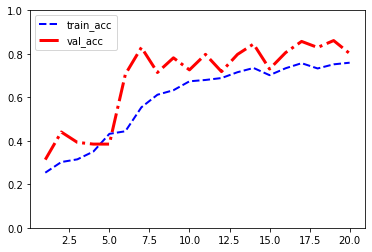

In [17]:
# 设置Y轴范围
plt.ylim(0,1)
# 训练准确率曲线
show_data1 = history.history['acc']
# 测试准确率曲线
show_data2 = history.history['val_acc']
x_data = list(range(1,len(show_data1)+1))
ln1, = plt.plot(x_data,show_data1,color='blue',linewidth=2.0,linestyle='--')
ln2, = plt.plot(x_data,show_data2,color='red',linewidth=3.0,linestyle='-.')
plt.legend(handles=[ln1,ln2],labels=['train_acc','val_acc'])
plt.show()